# Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Display to verify images

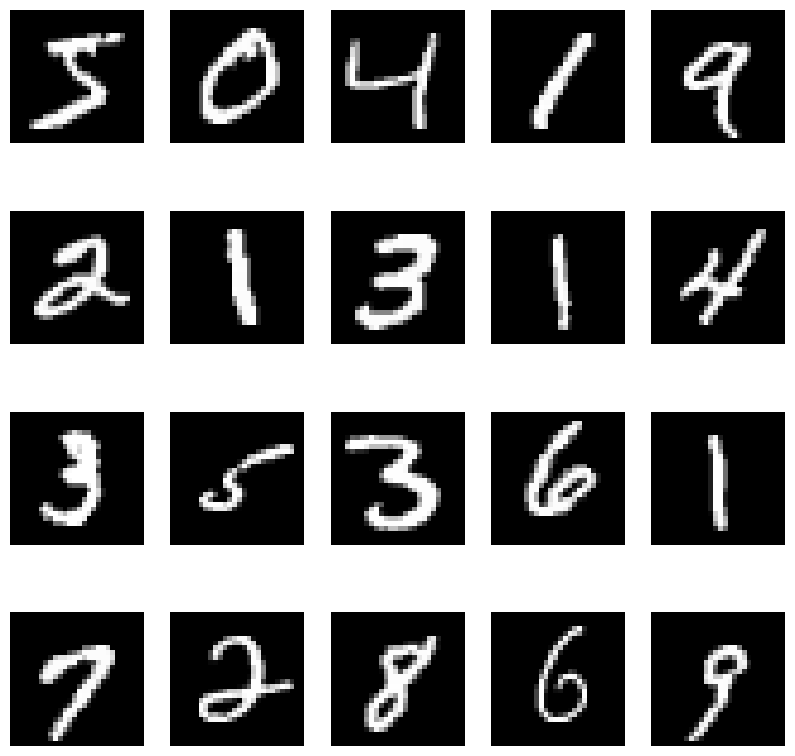

In [3]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Check sizes of the dataset

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Check by displaying images

0


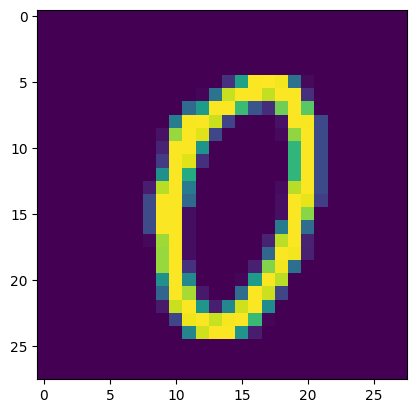

In [5]:
plt.imshow(x_train[1000])
print(y_train[1000])

# Get a small part of the dataset

# Check if small part is taken

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
x_test = x_test[0:10000]
y_test = y_test[0:10000]

In [8]:
print(y_test.shape)

(10000,)


# Normalize training and test dataset

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Import keras layers to make model

In [10]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Input, Dropout

# Initiate Sequential Model

In [11]:
model = Sequential()

# Make the model

In [12]:
shape=(28,28,1) # Input size
model.add(Input(shape)) # Input layer
model.add(Flatten(input_shape=(28, 28))) # Input layer faltten
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # Output layer

C:\Users\MPD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Print model Summary

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [14]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Run the model

In [15]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split = 0.2)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.8400 - loss: 0.5726 - val_Accuracy: 0.9456 - val_loss: 0.1905
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9516 - loss: 0.1665 - val_Accuracy: 0.9635 - val_loss: 0.1296
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - Accuracy: 0.9690 - loss: 0.1083 - val_Accuracy: 0.9687 - val_loss: 0.1080
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9767 - loss: 0.0797 - val_Accuracy: 0.9703 - val_loss: 0.1021
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9819 - loss: 0.0636 - val_Accuracy: 0.9721 - val_loss: 0.0929
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9864 - loss: 0.0491 - val_Accuracy: 0.9730 - val_loss: 0.0886
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9894 - loss: 0.0390 - val_Accuracy: 0.9751 - val_loss: 0.0847
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9910 - loss: 0.0318 - val_Accuracy: 0.

# Test the model

In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - Accuracy: 0.9738 - loss: 0.1200


[0.1003977432847023, 0.9778000116348267]

In [17]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


array([[1.2547987e-13, 8.8895268e-14, 8.3850586e-11, ..., 9.9999964e-01,
        2.7741955e-11, 3.2736069e-10],
       [6.0808346e-14, 2.7107736e-08, 1.0000000e+00, ..., 4.0820003e-20,
        2.2708189e-12, 2.5722836e-22],
       [4.5336238e-11, 9.9999905e-01, 2.8012087e-08, ..., 2.5239629e-07,
        6.7052412e-07, 9.1881419e-11],
       ...,
       [6.0087663e-25, 4.5062609e-20, 2.2061735e-23, ..., 1.1133138e-13,
        6.1157290e-14, 5.7725116e-11],
       [3.8361051e-19, 3.8008748e-16, 4.7545290e-22, ..., 4.2886387e-18,
        4.9712883e-09, 3.0045798e-19],
       [5.6212955e-16, 1.8764961e-22, 1.5765311e-15, ..., 7.9954721e-25,
        7.2425635e-18, 2.3466326e-23]], dtype=float32)

In [18]:
predict_x = model.predict(x_test)
classes_x = np.argmax(predict_x,axis=1)
classes_x

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Display results

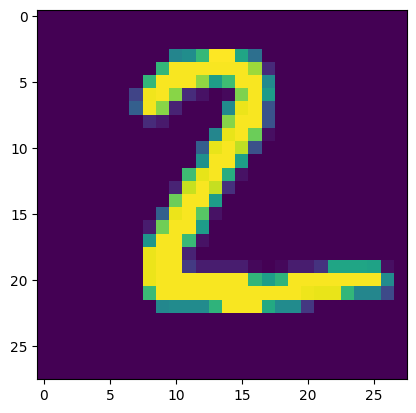

In [19]:
plt.imshow(x_test[1])

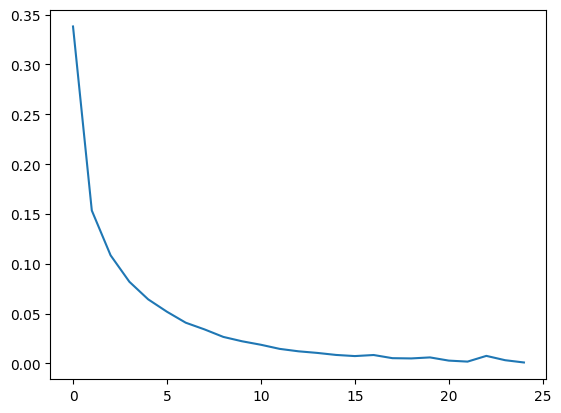

In [20]:
plt.plot(history.history['loss'])

# Plot results

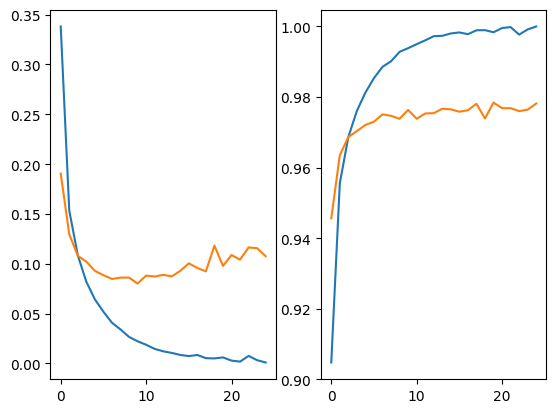

In [21]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

# Add drop out

In [26]:
model.add(Flatten(input_shape=(28, 28))) # Input layer faltten
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dropout(0.1))  # drop out 
model.add(Dense(10, activation='softmax')) # Output layer
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split = 0.2)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9168 - loss: 0.8226 - val_Accuracy: 0.9728 - val_loss: 0.1766
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9957 - loss: 0.0293 - val_Accuracy: 0.9746 - val_loss: 0.1804
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9977 - loss: 0.0147 - val_Accuracy: 0.9727 - val_loss: 0.1960
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9982 - loss: 0.0126 - val_Accuracy: 0.9715 - val_loss: 0.2057
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9978 - loss: 0.0141 - val_Accuracy: 0.9734 - val_loss: 0.1986
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9970 - loss: 0.0169 - val_Accuracy: 0.9753 - val_loss: 0.1934
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9979 - loss: 0.0133 - val_Accuracy: 0.9749 - val_loss: 0.2018
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9978 - loss: 0.0134 - val_Accuracy: 0.

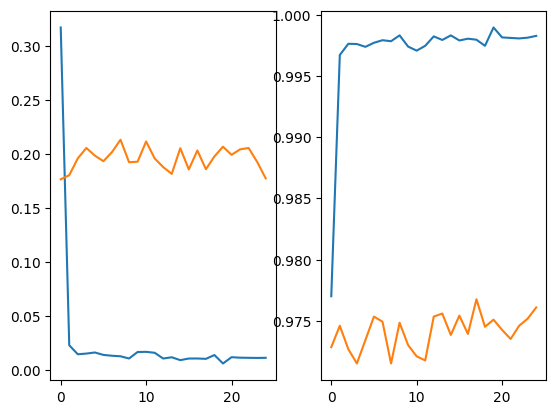

In [27]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])